In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime as dt
pd.options.display.float_format = '{:,.2f}'.format

# covid data files
covid_data_path = "../Data/covid-data.csv"
face_covering_path = "../Data/face-covering-policies-covid.csv"

# read data
covid_data = pd.read_csv(covid_data_path)
facemask_data = pd.read_csv(face_covering_path)

In [2]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.00,1.00,nan,nan,nan,nan,...,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan
1,AFG,Asia,Afghanistan,2020-02-25,1.00,0.00,nan,nan,nan,nan,...,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan
2,AFG,Asia,Afghanistan,2020-02-26,1.00,0.00,nan,nan,nan,nan,...,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan
3,AFG,Asia,Afghanistan,2020-02-27,1.00,0.00,nan,nan,nan,nan,...,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan
4,AFG,Asia,Afghanistan,2020-02-28,1.00,0.00,nan,nan,nan,nan,...,nan,597.03,9.59,nan,nan,37.75,0.50,64.83,0.51,nan


In [3]:
facemask_data.head()

,Entity,Code,Day,facial_coverings,Unnamed: 4,Unnamed: 5
0,Afghanistan,AFG,2020-01-01,0,nan,NaN
1,Afghanistan,AFG,2020-01-02,0,nan,NaN
2,Afghanistan,AFG,2020-01-03,0,nan,NaN
3,Afghanistan,AFG,2020-01-04,0,nan,NaN
4,Afghanistan,AFG,2020-01-05,0,nan,NaN


In [4]:
# merged_covid_df['location'].unique()
# # remove rows for continents to avoid duplicate value with countries

au_df = covid_data.loc[covid_data['location'] == 'Australia']
india_df = covid_data.loc[covid_data['location'] == 'India']
china_df = covid_data.loc[covid_data['location'] == 'China']
uk_df = covid_data.loc[covid_data['location'] == 'United Kingdom']
us_df = covid_data.loc[covid_data['location'] == 'United States']
brazil_df = covid_data.loc[covid_data['location'] == 'Brazil']
sk_df = covid_data.loc[covid_data['location'] == 'South Korea']

countries = [au_df, india_df, china_df, uk_df, us_df, brazil_df, sk_df]
country_df = pd.concat(countries)
country_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
5038,AUS,Oceania,Australia,2020-01-26,4.00,4.00,nan,nan,nan,nan,...,0.50,107.79,5.07,13.00,16.50,nan,3.84,83.44,0.94,6.16
5039,AUS,Oceania,Australia,2020-01-27,5.00,1.00,nan,nan,nan,nan,...,0.50,107.79,5.07,13.00,16.50,nan,3.84,83.44,0.94,nan
5040,AUS,Oceania,Australia,2020-01-28,5.00,0.00,nan,nan,nan,nan,...,0.50,107.79,5.07,13.00,16.50,nan,3.84,83.44,0.94,nan
5041,AUS,Oceania,Australia,2020-01-29,6.00,1.00,nan,nan,nan,nan,...,0.50,107.79,5.07,13.00,16.50,nan,3.84,83.44,0.94,nan
5042,AUS,Oceania,Australia,2020-01-30,9.00,3.00,nan,nan,nan,nan,...,0.50,107.79,5.07,13.00,16.50,nan,3.84,83.44,0.94,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80973,KOR,Asia,South Korea,2021-06-12,"147,874.00",452.00,531.71,"1,985.00",3.00,1.71,...,0.20,86.00,6.80,6.20,40.90,nan,12.27,83.03,0.92,nan
80974,KOR,Asia,South Korea,2021-06-13,"148,273.00",399.00,519.43,"1,988.00",3.00,2.00,...,0.20,86.00,6.80,6.20,40.90,nan,12.27,83.03,0.92,nan
80975,KOR,Asia,South Korea,2021-06-14,"148,647.00",374.00,508.00,"1,992.00",4.00,2.43,...,0.20,86.00,6.80,6.20,40.90,nan,12.27,83.03,0.92,nan
80976,KOR,Asia,South Korea,2021-06-15,"149,191.00",544.00,499.86,"1,993.00",1.00,2.29,...,0.20,86.00,6.80,6.20,40.90,nan,12.27,83.03,0.92,nan


In [5]:
# select required columns
# add extract month & year so we can group by month
country_df["month"] = country_df["date"].astype(str).str[5:7]
country_df['year'] = country_df["date"].astype(str).str[0:4]
country_df['month_year'] = country_df["date"].astype(str).str[0:7]
country_df_cleaned = country_df[['month_year','year', 'month', 'location', 'date', 'total_cases', 'new_cases','total_deaths' ,'new_deaths']]
country_df_cleaned

,month_year,year,month,location,date,total_cases,new_cases,total_deaths,new_deaths
5038,2020-01,2020,01,Australia,2020-01-26,4.00,4.00,nan,nan
5039,2020-01,2020,01,Australia,2020-01-27,5.00,1.00,nan,nan
5040,2020-01,2020,01,Australia,2020-01-28,5.00,0.00,nan,nan
5041,2020-01,2020,01,Australia,2020-01-29,6.00,1.00,nan,nan
5042,2020-01,2020,01,Australia,2020-01-30,9.00,3.00,nan,nan
...,...,...,...,...,...,...,...,...,...
80973,2021-06,2021,06,South Korea,2021-06-12,"147,874.00",452.00,"1,985.00",3.00
80974,2021-06,2021,06,South Korea,2021-06-13,"148,273.00",399.00,"1,988.00",3.00
80975,2021-06,2021,06,South Korea,2021-06-14,"148,647.00",374.00,"1,992.00",4.00
80976,2021-06,2021,06,South Korea,2021-06-15,"149,191.00",544.00,"1,993.00",1.00


In [6]:
count_of_new_cases = country_df_cleaned.groupby(['location','month_year']).sum()['new_cases']
count_of_new_cases = count_of_new_cases.reset_index()
count_of_new_cases

,location,month_year,new_cases
0,Australia,2020-01,9.00
1,Australia,2020-02,16.00
2,Australia,2020-03,"4,534.00"
3,Australia,2020-04,"2,207.00"
4,Australia,2020-05,436.00
...,...,...,...
120,United States,2021-02,"2,402,013.00"
121,United States,2021-03,"1,813,675.00"
122,United States,2021-04,"1,885,731.00"
123,United States,2021-05,"916,746.00"


In [7]:
count_of_total_cases = country_df_cleaned.groupby(['location','month_year']).sum()['total_cases']
count_of_total_cases = count_of_total_cases.reset_index()
count_of_total_cases

,location,month_year,total_cases
0,Australia,2020-01,38.00
1,Australia,2020-02,431.00
2,Australia,2020-03,"35,679.00"
3,Australia,2020-04,"188,206.00"
4,Australia,2020-05,"217,625.00"
...,...,...,...
120,United States,2021-02,"774,320,496.00"
121,United States,2021-03,"916,725,746.00"
122,United States,2021-04,"944,647,450.00"
123,United States,2021-05,"1,020,165,299.00"


In [8]:
face_mask_cleaned = facemask_data[['Entity', 'Code', 'Day', 'facial_coverings']]
face_mask_cleaned

,Entity,Code,Day,facial_coverings
0,Afghanistan,AFG,2020-01-01,0
1,Afghanistan,AFG,2020-01-02,0
2,Afghanistan,AFG,2020-01-03,0
3,Afghanistan,AFG,2020-01-04,0
4,Afghanistan,AFG,2020-01-05,0
...,...,...,...,...
97085,Zimbabwe,ZWE,2021-06-09,3
97086,Zimbabwe,ZWE,2021-06-10,3
97087,Zimbabwe,ZWE,2021-06-11,3
97088,Zimbabwe,ZWE,2021-06-12,3


In [9]:
fm_au_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'Australia']
fm_india_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'India']
fm_china_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'China']
fm_uk_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'United Kingdom']
fm_us_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'United States']
fm_brazil_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'Brazil']
fm_sk_df = face_mask_cleaned.loc[face_mask_cleaned['Entity'] == 'South Korea']

fm_countries = [fm_au_df, fm_india_df, fm_china_df, fm_uk_df, fm_us_df, fm_brazil_df, fm_sk_df]
fm_country_df = pd.concat(fm_countries)
fm_country_df

,Entity,Code,Day,facial_coverings
3680,Australia,AUS,2020-01-01,0
3681,Australia,AUS,2020-01-02,0
3682,Australia,AUS,2020-01-03,0
3683,Australia,AUS,2020-01-04,0
3684,Australia,AUS,2020-01-05,0
...,...,...,...,...
79810,South Korea,KOR,2021-06-10,3
79811,South Korea,KOR,2021-06-11,3
79812,South Korea,KOR,2021-06-12,3
79813,South Korea,KOR,2021-06-13,3


In [10]:
fm_country_df["month"] = fm_country_df["Day"].astype(str).str[5:7]
fm_country_df['year'] = fm_country_df["Day"].astype(str).str[0:4]
fm_country_df['month_year'] = fm_country_df["Day"].astype(str).str[0:7]
fm_country_df

,Entity,Code,Day,facial_coverings,month,year,month_year
3680,Australia,AUS,2020-01-01,0,01,2020,2020-01
3681,Australia,AUS,2020-01-02,0,01,2020,2020-01
3682,Australia,AUS,2020-01-03,0,01,2020,2020-01
3683,Australia,AUS,2020-01-04,0,01,2020,2020-01
3684,Australia,AUS,2020-01-05,0,01,2020,2020-01
...,...,...,...,...,...,...,...
79810,South Korea,KOR,2021-06-10,3,06,2021,2021-06
79811,South Korea,KOR,2021-06-11,3,06,2021,2021-06
79812,South Korea,KOR,2021-06-12,3,06,2021,2021-06
79813,South Korea,KOR,2021-06-13,3,06,2021,2021-06


In [11]:
count_of_facial_coverings = fm_country_df.groupby(['Entity', 'month_year']).mean()
count_of_facial_coverings = count_of_facial_coverings.reset_index()
count_of_facial_coverings

,Entity,month_year,facial_coverings
0,Australia,2020-01,0.00
1,Australia,2020-02,0.00
2,Australia,2020-03,0.00
3,Australia,2020-04,0.00
4,Australia,2020-05,0.00
...,...,...,...
118,United States,2021-01,4.00
119,United States,2021-02,4.00
120,United States,2021-03,4.00
121,United States,2021-04,4.00


In [12]:
# merge selected_covid_data and face coverings
new_cases_merged_df = pd.merge(count_of_new_cases, count_of_facial_coverings, how='left',
                           left_on=['month_year'], 
                               right_on = ['month_year'])
new_cases_merged_df = new_cases_merged_df.drop(columns=['Entity'])
new_cases_merged_df

,location,month_year,new_cases,facial_coverings
0,Australia,2020-01,9.00,0.00
1,Australia,2020-01,9.00,0.00
2,Australia,2020-01,9.00,1.68
3,Australia,2020-01,9.00,0.00
4,Australia,2020-01,9.00,0.00
...,...,...,...,...
849,United States,2021-05,"916,746.00",4.00
850,United States,2021-06,"230,961.00",3.00
851,United States,2021-06,"230,961.00",2.00
852,United States,2021-06,"230,961.00",3.00


In [13]:
total_cases_merged_df = pd.merge(count_of_total_cases, count_of_facial_coverings, how='left',
                           left_on=['month_year'], 
                               right_on = ['month_year'])
total_cases_merged_df = total_cases_merged_df.drop(columns=['Entity'])
total_cases_merged_df

,location,month_year,total_cases,facial_coverings
0,Australia,2020-01,38.00,0.00
1,Australia,2020-01,38.00,0.00
2,Australia,2020-01,38.00,1.68
3,Australia,2020-01,38.00,0.00
4,Australia,2020-01,38.00,0.00
...,...,...,...,...
849,United States,2021-05,"1,020,165,299.00",4.00
850,United States,2021-06,"534,418,075.00",3.00
851,United States,2021-06,"534,418,075.00",2.00
852,United States,2021-06,"534,418,075.00",3.00


In [14]:
monthly_new_case = new_cases_merged_df.groupby(['month_year'])['new_cases'].sum()
monthly_new_case

month_year
2020-01       64,897.00
2020-02      508,942.00
2020-03    1,761,291.00
2020-04    8,037,715.00
2020-05    9,668,204.00
2020-06   15,090,348.00
2020-07   30,291,856.00
2020-08   33,241,901.00
2020-09   33,990,152.00
2020-10   35,624,631.00
2020-11   50,482,124.00
2020-12   66,249,148.00
2021-01   66,642,590.00
2021-02   31,330,908.00
2021-03   37,141,993.00
2021-04   75,820,514.00
2021-05   83,322,918.00
2021-06   11,805,372.00
Name: new_cases, dtype: float64

In [15]:
monthly_total_case = total_cases_merged_df.groupby(['month_year'])['total_cases'].sum()
monthly_total_case

month_year
2020-01          266,434.00
2020-02       11,518,318.00
2020-03       29,670,935.00
2020-04      194,317,263.00
2020-05      467,032,783.00
2020-06      807,658,950.00
2020-07    1,535,431,723.00
2020-08    2,560,446,868.00
2020-09    3,490,304,125.00
2020-10    4,671,318,134.00
2020-11    5,793,356,856.00
2020-12    7,845,537,140.00
2021-01    9,989,480,095.00
2021-02   10,329,627,378.00
2021-03   12,422,863,509.00
2021-04   13,606,318,614.00
2021-05   16,883,442,394.00
2021-06    5,403,654,508.00
Name: total_cases, dtype: float64

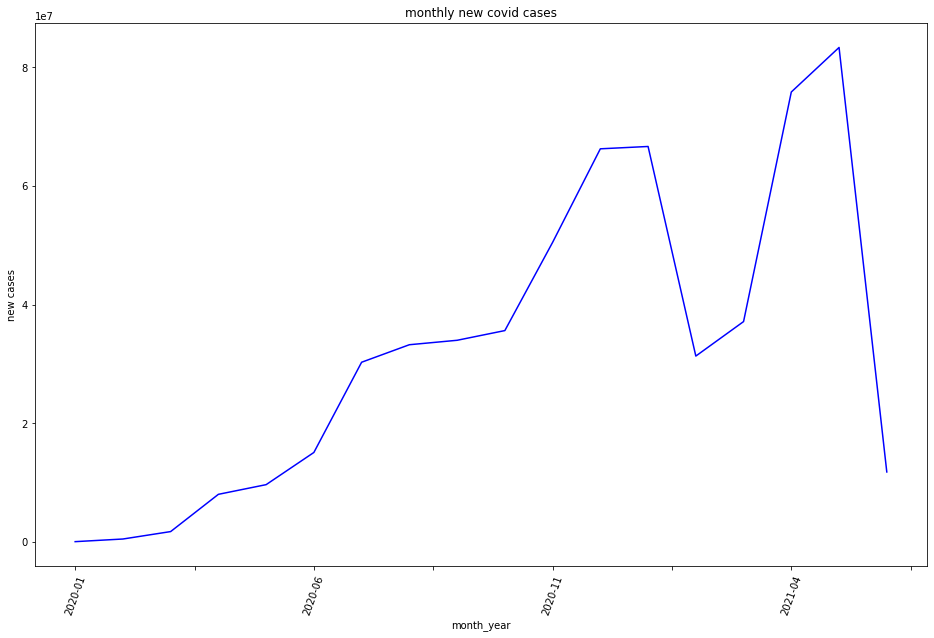

In [16]:
monthly_new_case.plot(kind="line", color="b", figsize=(16, 10))
plt.title("monthly new covid cases")
plt.ylabel("new cases")
plt.xlabel("month_year")
plt.xticks(rotation=70)
# ax2=ax.twinx()
plt.show()

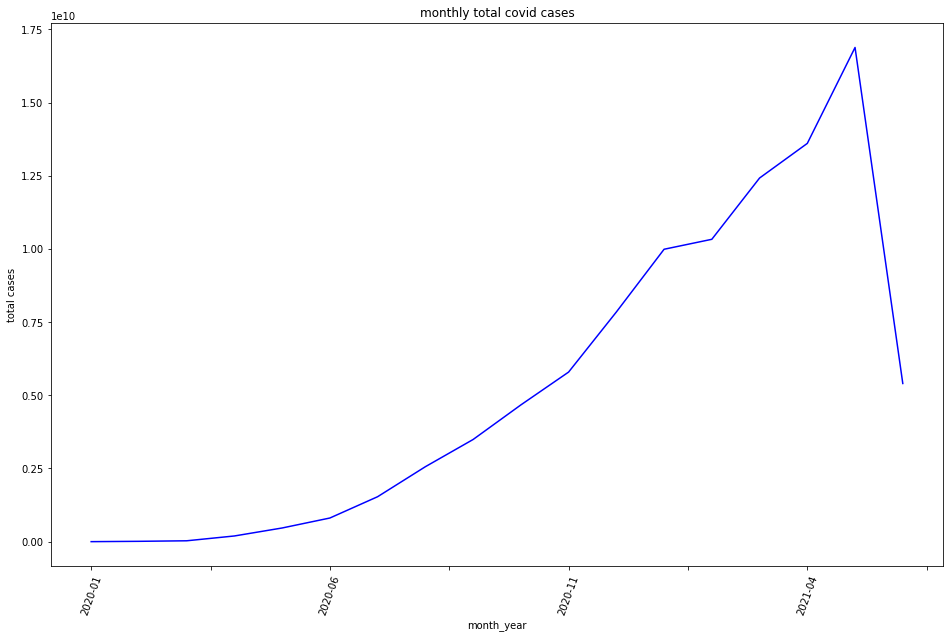

In [17]:
monthly_total_case.plot(kind="line", color="b", figsize=(16, 10))
plt.title("monthly total covid cases")
plt.ylabel("total cases")
plt.xlabel("month_year")
plt.xticks(rotation=70)
# ax2=ax.twinx()
plt.show()

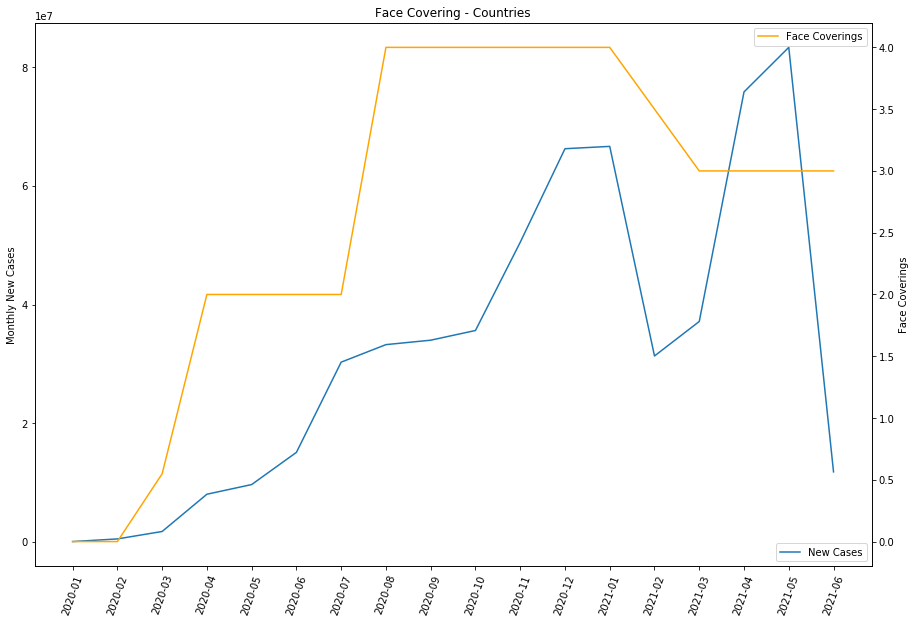

In [18]:
monthly_new_case = new_cases_merged_df.groupby(['month_year'])['new_cases'].sum()
face_covering = new_cases_merged_df.groupby(['month_year'])['facial_coverings'].median()

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_ylabel("Monthly New Cases")
ax.plot(monthly_new_case)
    
plt.xticks(rotation=70)
ax2=ax.twinx()
   
plt.title("Face Covering - Countries")
plt.xlabel("Month Year")
plt.ylabel("New Cases")
    
ax2.plot(face_covering, color="orange")
ax2.set_ylabel("Face Coverings")
legend = ax.legend(["New Cases"], loc='lower right')
legend2 = ax2.legend(["Face Coverings"], loc='upper right')
    
#     filpath = f"output/{country}_new_case_travel_control.png"
#     fig.savefig(filpath)
plt.show()

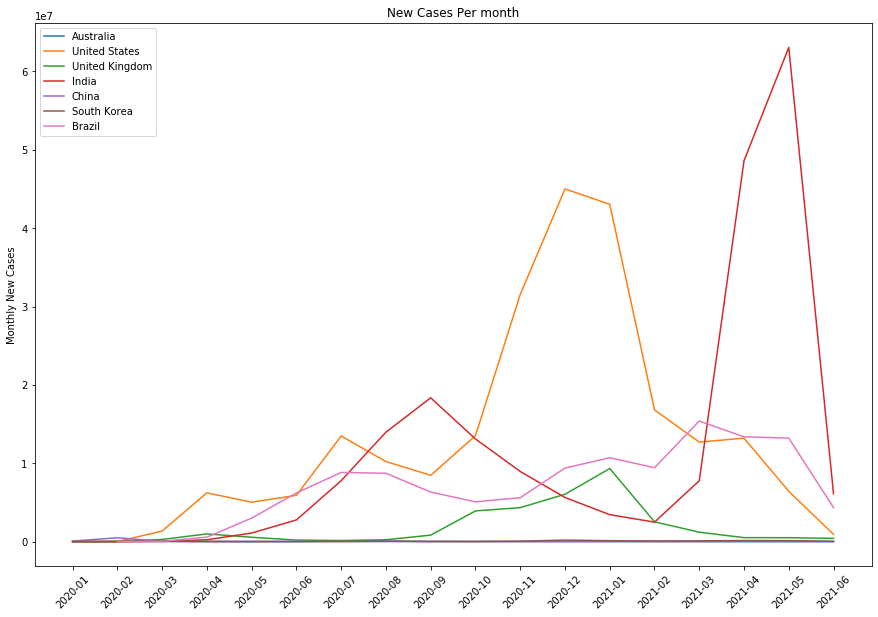

In [19]:
fig,ax = plt.subplots(figsize=(15,10))
countries = ['Australia','United States','United Kingdom','India',
             'China', 'South Korea', 'Brazil']
for country in countries:
    monthly_new_cases = new_cases_merged_df[(new_cases_merged_df["location"] == country)].groupby(['month_year'])['new_cases'].sum()
    face_mask = new_cases_merged_df[(new_cases_merged_df["location"] == country)].groupby(['month_year'])['facial_coverings'].median()

    ax.set_ylabel("Monthly New Cases")
    ax.plot(monthly_new_cases, label = country)
    
ax.set_ylabel('Monthly New Cases')
ax.set_title('New Cases Per month')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/new_cases_7_countries.png")
plt.show()

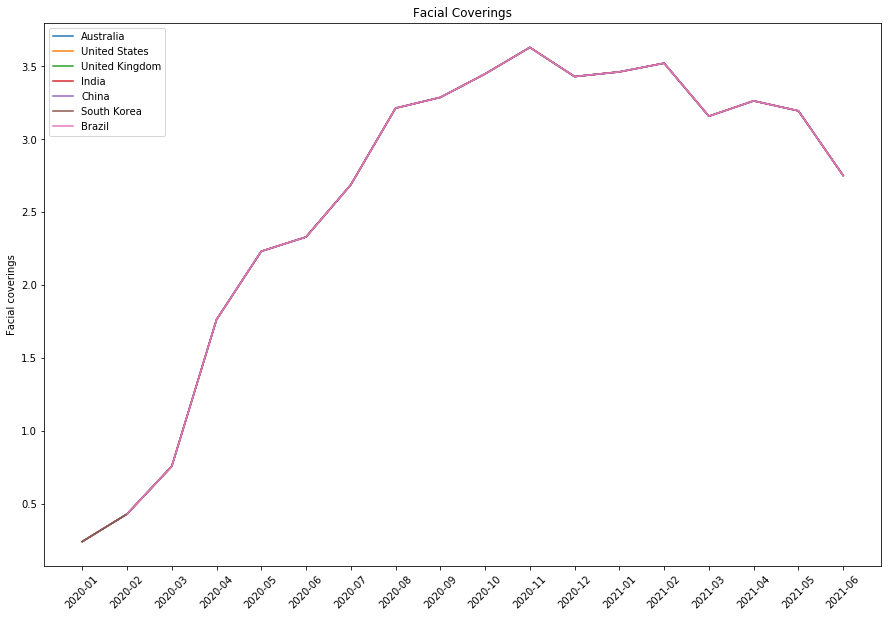

In [20]:
fig,ax = plt.subplots(figsize=(15,10))
countries = ['Australia','United States','United Kingdom','India',
             'China', 'South Korea', 'Brazil']
for country in countries:
    monthly_new_cases = new_cases_merged_df[(new_cases_merged_df["location"] == country)].groupby(['month_year'])['new_cases'].sum()
    face_mask = new_cases_merged_df[(new_cases_merged_df["location"] == country)].groupby(['month_year'])['facial_coverings'].mean()

    ax.set_ylabel("Facial coverings")
    ax.plot(face_mask, label = country)
    
ax.set_title('Facial Coverings')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/face_covering_new_cases.png")
plt.show()

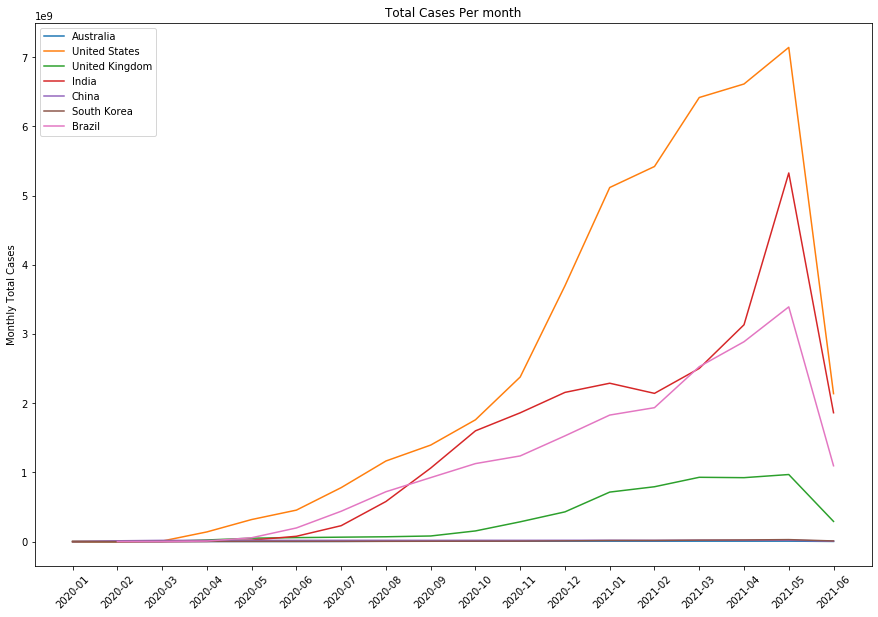

In [21]:
fig,ax = plt.subplots(figsize=(15,10))
countries = ['Australia','United States','United Kingdom','India',
             'China', 'South Korea', 'Brazil']
for country in countries:
    monthly_total_case = total_cases_merged_df[(total_cases_merged_df["location"] == country)].groupby(['month_year'])['total_cases'].sum()
    face_mask = total_cases_merged_df[(total_cases_merged_df["location"] == country)].groupby(['month_year'])['facial_coverings'].median()

    ax.set_ylabel("Monthly Total Cases")
    ax.plot(monthly_total_case, label = country)
    
ax.set_ylabel('Monthly Total Cases')
ax.set_title('Total Cases Per month')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/total_cases_7_countries.png")
plt.show()

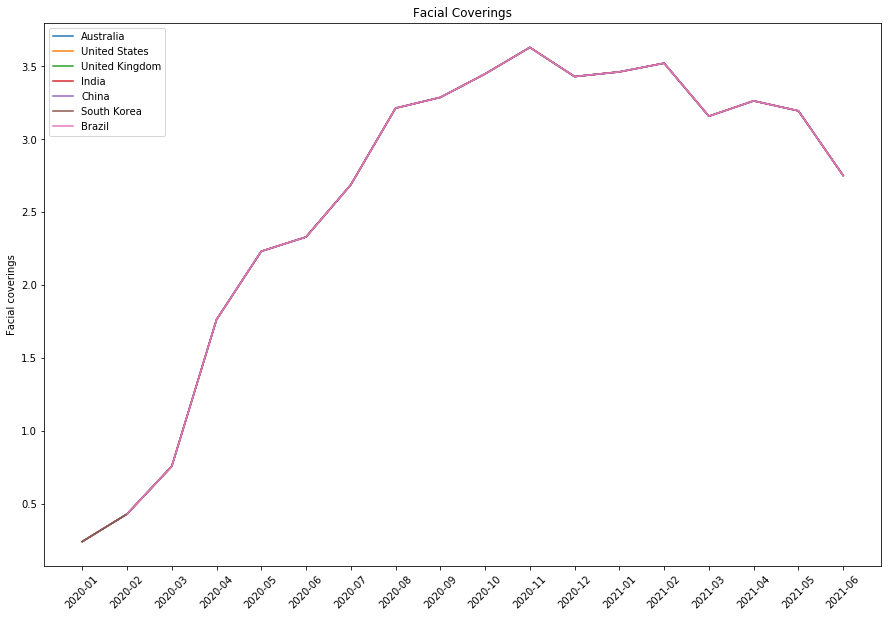

In [22]:
fig,ax = plt.subplots(figsize=(15,10))
countries = ['Australia','United States','United Kingdom','India',
             'China', 'South Korea', 'Brazil']
for country in countries:
    monthly_total_fm_cases = total_cases_merged_df[(total_cases_merged_df["location"] == country)].groupby(['month_year'])['total_cases'].sum()
    face_mask = total_cases_merged_df[(total_cases_merged_df["location"] == country)].groupby(['month_year'])['facial_coverings'].mean()

    ax.set_ylabel("Facial coverings")
    ax.plot(face_mask, label = country)
    
ax.set_title('Facial Coverings')
ax.legend()
plt.xticks(rotation=45)
plt.savefig("output/face_covering_total_cases.png")
plt.show()